# [Day051-053 機器學習百日馬拉松期中考] 
## Enron Fraud Dataset 安隆公司詐欺案資料集

- 安隆公司曾是一間能源公司，2001 年破產前是世界上最大的電力、天然氣及電信公司之一。擁有上千億資產的公司於 2002 年竟然在短短幾周內宣告破產，才揭露其財報在多年以來均是造假的醜聞。


- 在本資料集中你將會扮演偵探的角色，透過高層經理人內部的 mail 來往的情報以及薪資、股票等財務特徵，訓練出一個機器學習模型來幫忙你找到可疑的詐欺犯罪者是誰!我們已經先幫你找到幾位犯罪者 (Person-of-Interest, poi) 與清白的員工，請利用這些訓練資料來訓練屬於自己的詐欺犯機器學習模型吧!
*******************************************************
### 特徵說明

#### [財務]有關的特徵:
['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 

#### [email]有關的特徵:
['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

#### 嫌疑人的標記(label): 
POI label: [‘poi’] (boolean, represented as integer)

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
import warnings
import os
import matplotlib.pyplot as plt

# 跳過警告訊息
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# 設定 data_path
dir_data = './Midterm exam'

# 讀取訓練檔
# pd.read_csv(header = None): 指定行數用來作為列名
train = os.path.join(dir_data, 'train_data.csv')
df_train  = pd.read_csv(train,header = 0)

# 讀取測試檔
# pd.read_csv(header = None): 指定行數用來作為列名
test = os.path.join(dir_data, 'test_features.csv')
df_test = pd.read_csv(test,header = 0)

print("train_data:" + str(df_train.shape))
print("test_shape:" +  str(df_test.shape))

train_data:(113, 22)
test_shape:(33, 21)


In [2]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [3]:
# set: 集合是一個無順序的不重複元素序列
# 查看訓練資料的欄位(columns名稱)
df_trname = set(df_train.columns)
# 查看測試資料的欄位(columns名稱)
df_tename = set(df_test.columns)

# 以訓練欄位名稱資料為主，測試欄位名稱為輔，觀看測試資料所缺少的欄位
sd = df_trname.difference(df_tename)
print("缺少的欄位資料為:", sd)
print() # 空一行
# 以訓練欄位名稱資料為主，測試欄位名稱為輔，觀看兩者(訓練資料與測試資料)的共同之處
ss = df_trname.intersection(df_tename)
print("兩者資料共同之處:", ss)

缺少的欄位資料為: {'poi'}

兩者資料共同之處: {'total_stock_value', 'total_payments', 'shared_receipt_with_poi', 'to_messages', 'restricted_stock', 'exercised_stock_options', 'deferral_payments', 'director_fees', 'loan_advances', 'from_poi_to_this_person', 'salary', 'name', 'other', 'restricted_stock_deferred', 'from_messages', 'expenses', 'email_address', 'from_this_person_to_poi', 'bonus', 'deferred_income', 'long_term_incentive'}


************************
# ouliters_detection (離群值偵測)
## 開始檢視不同欄位是否有異常值

編號: 0 金融欄位:  salary


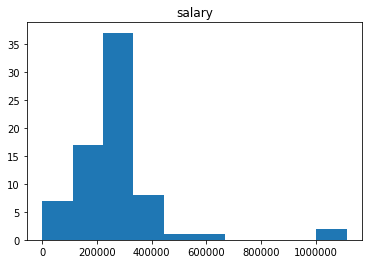

編號: 1 金融欄位:  deferral_payments


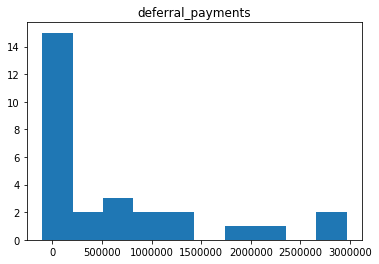

編號: 2 金融欄位:  total_payments


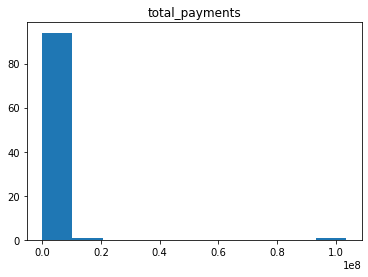

編號: 3 金融欄位:  loan_advances


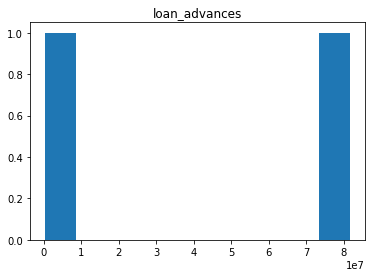

編號: 4 金融欄位:  bonus


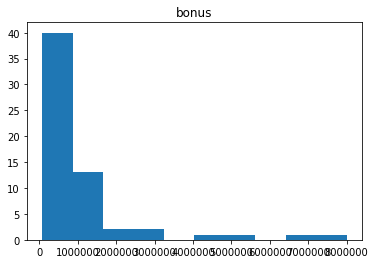

編號: 5 金融欄位:  restricted_stock_deferred


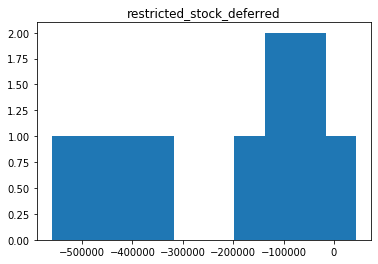

編號: 6 金融欄位:  deferred_income


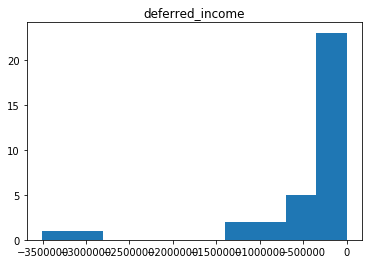

編號: 7 金融欄位:  total_stock_value


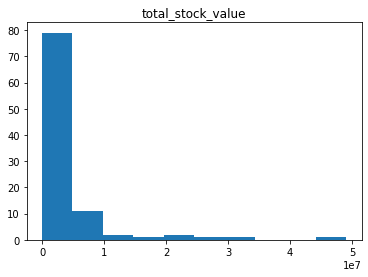

編號: 8 金融欄位:  expenses


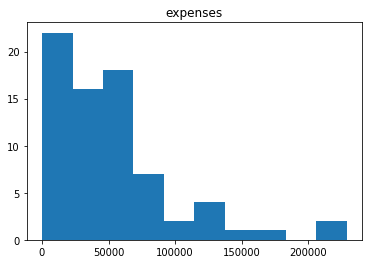

編號: 9 金融欄位:  exercised_stock_options


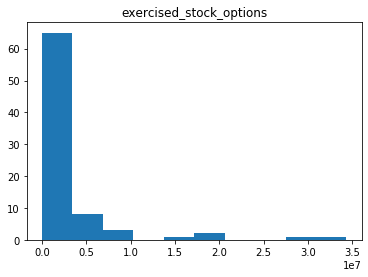

編號: 10 金融欄位:  other


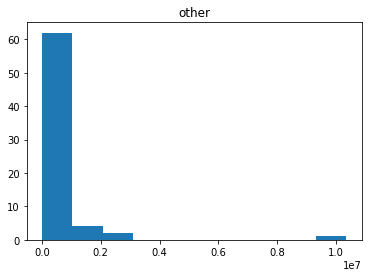

編號: 11 金融欄位:  long_term_incentive


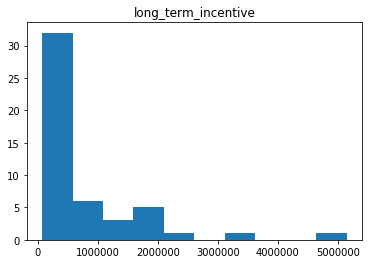

編號: 12 金融欄位:  restricted_stock


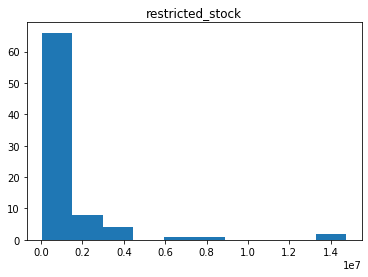

編號: 13 金融欄位:  director_fees


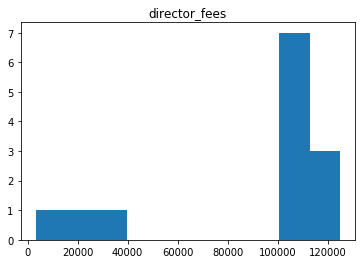

In [4]:
# 設定財務相關欄位
Finance_column = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 

for i, Finname in enumerate(Finance_column):
    print("編號:", i,"金融欄位: ",Finname)
    plt.title(str(Finname))
    plt.hist(df_train[Finname])
    plt.show()
    print("==================================================================")

## 金融欄位
### 特殊欄位(有可能有離群值)
經由上面圖表觀察發現稍有特殊的欄位，有可能有離群值的存在

- total_payments
反映根據公司績效支付的年度現金獎勵。 還可能包括其他保留金。
- loan_advances
反映債務人為償還諾言而提供的預付款總額（不包括償還）。 在某些情況下，期票的條款允許選擇用公司股票還款。
- other 
- 反映了諸如嚴重性支付，諮詢服務，搬遷成本，預支稅款和為國際任務分配給僱員的津貼（例如，住房津貼，生活津貼，根據安然稅收均等計劃支付的款項等）等項目。 也可能包括與僱傭協議有關的付款，以及使用公務機之類的估算收入金額。

*******************************************************

In [5]:
anom_topay = df_train[df_train['total_payments'] >= 0.8e8]
non_topay = df_train[df_train["total_payments"] < 0.8e8]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_topay['poi'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom_topay['poi'].mean()))
print('There are %d anomalous days of employment' % len(anom_topay))

The non-anomalies default on 12.63% of loans
The anomalies default on 100.00% of loans
There are 1 anomalous days of employment


In [6]:
sum(df_train["total_payments"] >= 0.8e8)/len(df_train)

0.008849557522123894

In [7]:
anom_topay = df_train[df_train['loan_advances'] >= 1e7]
non_topay = df_train[df_train["loan_advances"] < 1e7]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_topay['poi'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom_topay['poi'].mean()))
print('There are %d anomalous days of employment' % len(anom_topay))

The non-anomalies default on 0.00% of loans
The anomalies default on 100.00% of loans
There are 1 anomalous days of employment


In [8]:
sum(df_train["loan_advances"] >= 1e7)/len(df_train)

0.008849557522123894

In [9]:
anom_topay = df_train[df_train['other'] >= 1e7]
non_topay = df_train[df_train["other"] < 1e7]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_topay['poi'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom_topay['poi'].mean()))
print('There are %d anomalous days of employment' % len(anom_topay))

The non-anomalies default on 17.65% of loans
The anomalies default on 100.00% of loans
There are 1 anomalous days of employment


In [10]:
sum(df_train['other'] >= 1e7)/len(df_train)

0.008849557522123894

# 離群值測試結果
-經由上述測試結果發現三個財金相關欄位"total_payments"、"loan_advances"與"other"的值有可能屬於正常資料。

In [11]:
train_Y = df_train['poi']
names = df_test['name']

# 移除"name"、"email_address"與"poi"欄位資料
df_train = df_train.drop(['name', 'email_address', 'poi'] , axis=1)
df_test = df_test.drop(['name', 'email_address'] , axis=1)


# 進行訓練資料與測試資料的合併
df = pd.concat([df_train,df_test])

df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [12]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [13]:
# 部分欄位缺值填補 0
zero_cols = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] 
             
for col in zero_cols:
    df[col] = df[col].fillna(0) # df.fillna(0)所有缺失值字段填充爲0
    
# 部分欄位缺值填補平均值
mode_cols = ['to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mean()) # df.fillna(df[col].mean())所有缺失值字段填充爲平均數

In [14]:
# 做完各種補缺值, 確認一下有沒有遺漏
na_check(df)

,Missing Ratio


In [15]:
# Remove the outlier individuals
# df.drop(inplace=True)：不創建新的對象，直接對原始對象進行修改；
# df.drop(axis=0, labels=[20,6,58],inplace=True)

#添加的新的電子郵件的功能的數據集
df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages'] 
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df ['from_messages'] 
df['shared_poi_ratio'] = df['shared_receipt_with_poi'] / df['to_messages']

#創造新的財務特徵並加入到數據集中
df['bonus_to_salary'] = df['bonus'] / df['salary'] 
df['bonus_to_total'] = df['bonus'] / df['total_payments' ]

# 部分欄位缺值填補 0
zero_cols = ['bonus_to_salary','bonus_to_total']
           
for col in zero_cols:
    df[col] =df[col].fillna(0) #df.fillna(0)所有缺失值字段填充爲0

In [16]:
# 檢查 DataFrame 空缺值的狀態
na_check(df)
df.head()

,Missing Ratio


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,to_poi_ratio,from_poi_ratio,shared_poi_ratio,bonus_to_salary,bonus_to_total
0,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,18.000000,42.000000,4.000000,0.0,...,420636.0,864.000000,905.000000,505050.0,22542539.0,0.046409,0.222222,0.954696,4.160367,3.465003
1,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,108.000000,88.000000,30.000000,0.0,...,1111258.0,2042.000000,3627.000000,8682716.0,26093672.0,0.024262,0.277778,0.563000,5.039334,0.644959
2,200000.0,0.0,-4167.0,0.0,1624396.0,22884.0,39.000000,13.000000,14.000000,0.0,...,211844.0,91.000000,225.000000,2003885.0,2493616.0,0.057778,0.358974,0.404444,0.944091,0.099806
3,800000.0,0.0,0.0,0.0,0.0,118134.0,608.790698,64.895349,41.232558,0.0,...,224305.0,1176.465116,2073.860465,2652612.0,985032.0,0.031292,0.067729,0.567283,3.566572,0.301590
4,1250000.0,0.0,-262500.0,0.0,0.0,35818.0,144.000000,199.000000,25.000000,0.0,...,240189.0,2188.000000,2598.000000,1639297.0,126027.0,0.076597,0.173611,0.842186,5.204235,0.762522


In [17]:
# 將資料最大最小化
# fit來學習編碼，設定最大最小化，將特徵值限制在0~1之間，transform進行編碼
df = MinMaxScaler().fit_transform(df)

# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# 三種模型的參數採用預設，暫時不作調整

# 載入線性回歸模型
lr = LogisticRegression()
# 載入梯度提升機模型
gdbt = GradientBoostingClassifier()
# 載入隨機森林模型
rf = RandomForestClassifier()

In [18]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
# 訓練線性回歸模型
lr.fit(train_X, train_Y)
# 線性迴歸模型的預測測試集
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': lr_pred})

print(sub.head())
# 進行交叉焓驗證，並計算交叉驗證的平均值
cross_val_score(lr, train_X, train_Y, cv=6).mean() # cv參數用於規定將原始數據分成多少份

                 name       poi
0    BELDEN TIMOTHY N  0.236062
1  BOWEN JR RAYMOND M  0.239463
2      HANNON KEVIN P  0.390139
3    DELAINEY DAVID W  0.111740
4    CAUSEY RICHARD A  0.161118


0.884990253411306

In [19]:
# 梯度提升機預測檔 
# 訓練梯度提升機模型
gdbt.fit(train_X, train_Y)
# 梯度提升機模型的預測測試集
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': gdbt_pred})
print(sub.head())
# 進行交叉焓驗證，並計算交叉驗證的平均值
cross_val_score(gdbt, train_X, train_Y, cv=6).mean() # cv參數用於規定將原始數據分成多少份

                 name       poi
0    BELDEN TIMOTHY N  0.144051
1  BOWEN JR RAYMOND M  0.862453
2      HANNON KEVIN P  0.987165
3    DELAINEY DAVID W  0.024493
4    CAUSEY RICHARD A  0.017433


0.8148148148148149

In [20]:
# 隨機森林預測檔
# 訓練隨機森林模型
rf.fit(train_X, train_Y)
# 隨機森林模型的預測測試集
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': rf_pred})
print(sub.head())
# 進行交叉焓驗證，並計算交叉驗證的平均值
cross_val_score(rf, train_X, train_Y, cv=6).mean() # cv參數用於規定將原始數據分成多少份

                 name   poi
0    BELDEN TIMOTHY N  0.35
1  BOWEN JR RAYMOND M  0.44
2      HANNON KEVIN P  0.57
3    DELAINEY DAVID W  0.11
4    CAUSEY RICHARD A  0.37


0.884990253411306

In [21]:
# 混合泛化預測檔
blending_pred = (lr_pred * 0.3325 + gdbt_pred * 0.05 + rf_pred * 0.6175) 

sub = pd.DataFrame({'name': names, 'poi': blending_pred})
sub.to_csv('default.csv', index=False)